# 1. Imports


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.datasets import make_blobs


sns.set(style="whitegrid")


# 2. Generate Dataset

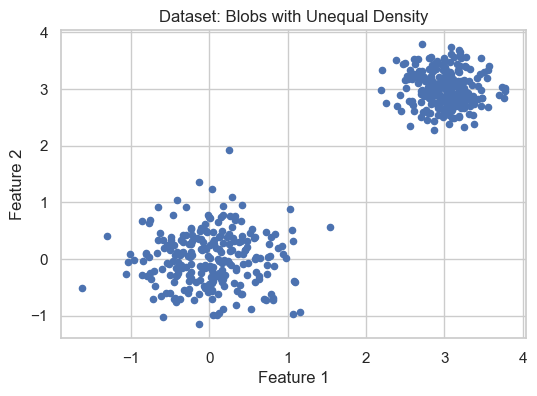

In [2]:
# 2. Generate dataset with uneven cluster densities
X, _ = make_blobs(n_samples=500,
                  centers=[[0, 0], [3, 3]],
                  cluster_std=[0.5, 0.3],
                  random_state=42)

plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], s=20)
plt.title("Dataset: Blobs with Unequal Density")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 3. K-Means Clustering

c:\Users\Montassar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


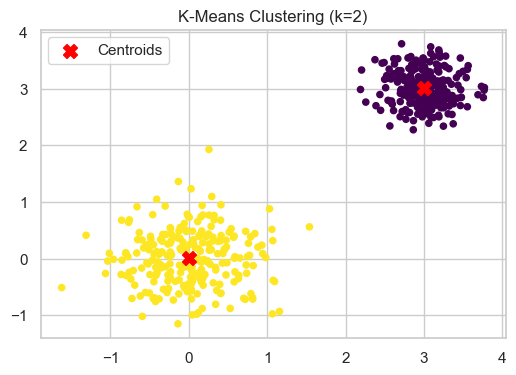

K-Means Silhouette Score: 0.836


In [5]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Plot K-Means results
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=20)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=100, label='Centroids')
plt.title("K-Means Clustering (k=2)")
plt.legend()
plt.show()

# Silhouette Score
kmeans_score = silhouette_score(X, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_score:.3f}")


# 4. DBSCAN Clustering

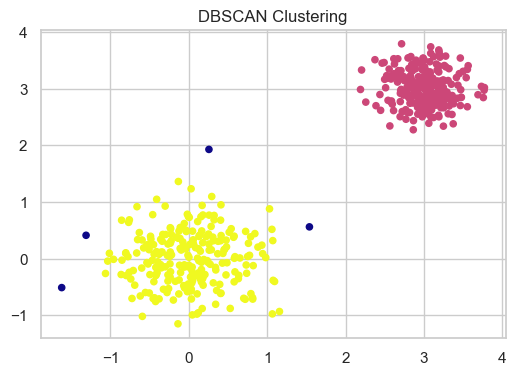

DBSCAN Silhouette Score (excluding noise): 0.840


In [14]:
dbscan = DBSCAN(eps=0.4, min_samples=4)
dbscan_labels = dbscan.fit_predict(X)

plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='plasma', s=20)
plt.title("DBSCAN Clustering")
plt.show()

mask = dbscan_labels != -1  # exclude noise
if len(np.unique(dbscan_labels[mask])) > 1:
    dbscan_score = silhouette_score(X[mask], dbscan_labels[mask])
    print(f"DBSCAN Silhouette Score (excluding noise): {dbscan_score:.3f}")
else:
    print("DBSCAN detected less than 2 clusters; silhouette score not applicable.")


# 5. Conclusion Cell

In [15]:
print("Summary:")
print(f"- K-Means Silhouette Score: {kmeans_score:.3f}")
if len(np.unique(dbscan_labels[mask])) > 1:
    print(f"- DBSCAN Silhouette Score: {dbscan_score:.3f}")
else:
    print("- DBSCAN failed to find meaningful clusters.")


Summary:
- K-Means Silhouette Score: 0.836
- DBSCAN Silhouette Score: 0.840


## Applying K-means Clustering in Real Life



K-means clustering is not just for academic study; it's also a practical tool used in many everyday business situations. Understanding how to use K-means in real-life scenarios can show its importance and how it can help in business.

- **Customer Segmentation:** Businesses often use K-means to group customers based on things like what they buy, their preferences, and where they live. This helps businesses create special marketing plans, develop products, and offer services that appeal more to each group of customers.**Example:** A store groups its customers by looking at what they buy. This helps the store send marketing messages to each group that are more likely to get their interest.

- **Managing Inventory:** K-means can help businesses handle their stock better. By grouping products based on how well they sell and other factors, businesses can keep the right amount of stock, lower costs, and make their supply chain better. **Example:** A clothing store uses K-means to sort clothes based on how quickly they sell and the time of year. This helps the store know how much of each type of clothing to keep in stock.

- **Sorting Documents:** K-means is useful for organizing lots of documents. This is good for finding information quickly, keeping large databases organized, and making work with documents more efficient.**Example:** A law firm uses K-means to sort many case files. This makes it easier to find the right documents for each legal case.

- **Studying the Market:** K-means can help understand market trends by analyzing data about the market. This is important for planning, entering new markets, and understanding competition.**Example**: A company that studies markets uses K-means to look at survey data. This helps them see different groups of customers and what they like in a specific area.

**Conclusion:** K-means clustering helps businesses in many ways. It can find patterns in data and group complex data into useful categories. This helps in making good decisions and working more efficiently. As you learn about data analysis, knowing how to use K-means in these situations will be very useful for your career.

[DB Scan Demo Tool](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) stands out in the realm of clustering algorithms for its proficiency in handling complex datasets. It is uniquely capable of identifying clusters of various shapes and sizes, and is particularly adept at managing outliers and noise.

**Example:** Consider a park with people scattered around: some in groups, some standing alone. DBSCAN identifies clusters of people standing close together (within a distance `eps` and in groups larger than `min_samples`). Those who are part of a group are in a cluster, while individuals far from any group are treated as outliers.

[DBSCAN Link](https://www.youtube.com/watch?v=RDZUdRSDOok&ab_channel=StatQuestwithJoshStarmer)

- **Comparison with K-means:**

    - **K-means**: A centroid-based clustering method that partitions the data into K clusters. K-means assumes clusters to be convex-shaped (like circles or spheres) and requires the number of clusters to be specified in advance. Unlike DBSCAN, K-means can struggle with non-convex clusters and is sensitive to outliers.
  

    DBSCAN's ability to handle irregularly shaped clusters and identify outliers gives it a significant edge in real-world datasets where such features are common. This makes DBSCAN a highly valuable tool for exploratory data analysis, particularly in complex scenarios where K-means not yield optimal results.
    
![](https://miro.medium.com/v2/resize:fit:1400/1*rfi9uHjGPdNgXgxe9xWvVw.png)

##### Simple Explanation of DBSCAN:

1. **What DBSCAN Does**: It groups together points that are close to each other based on a set distance and minimum number of points. Points that are not in dense areas are marked as outliers.

2. **Key Terms in DBSCAN**:
   - **eps (ε)**: A distance measure that defines how close points should be to each other to be considered part of a cluster.
   - **min_samples**: The minimum number of points required to form a dense region, which DBSCAN treats as a cluster.

3. **Types of Points**:
   - **Core Points**: A point that has at least a minimum number of other points (min_samples) within a certain distance (eps).
   - **Border Points**: Points that are within the distance (eps) of a core point but don't have enough points nearby to be core points themselves.
   - **Noise Points**: Points that are neither core nor border points.

##### Why Use DBSCAN?

- **Good for Complex Shapes**: Unlike K-means, DBSCAN doesn't assume that clusters are round, so it can find clusters of any shape.
- **Handles Outliers Well**: It can identify and ignore outliers, making it robust in real-world data scenarios.
- **No Need to Specify Cluster Number**: You don't need to know how many clusters you're looking for, which is a requirement in some other algorithms like K-means.

##### Common Use Cases:

- **Geographical Data Analysis**: Like identifying areas of similar land use in satellite images.
- **Anomaly Detection**: Such as identifying fraudulent transactions in banking.

